# Data 201

Data Wrangling, S2 2019

### This assignment is the work of Rhys Jennings (29656157) & Callum Aubrey (3258656)

## Assignment 2

### 20% of final grade

## Due date: 1pm Tuesday 1 October 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 20 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments, means better marks.  
You can either modify this notebook or write a new one from scratch.

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 7.

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [1]:
# Load some packages
library(tidyverse)
library(xml2)
library(rvest)

library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings 

library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse



In [2]:
# Taken from stackoverflow - https://stackoverflow.com/questions/2261079/how-to-trim-leading-and-trailing-whitespace
trim <- function (x) gsub("^\\s+|\\s+$", "", x)

# We start here with a list of 'AOC' monitors
url_titles <- "https://www.mightyape.co.nz/computers/monitors?q=brand%7Eaoc"

# Start reading the HTML
page_title <- read_html(url_titles)

# Get the monitor titles
monitor_title_text <- page_title %>%
    html_nodes(".details") %>%
    html_nodes(".title") %>%
    html_text()

# Here we are stripping the \r\n tags
monitor_title_text <- gsub("[\r\n]", "", monitor_title_text)
# Then we are stripping the \" part of the string
monitor_title_text <- gsub("[\"]", "", monitor_title_text)
# Now we are removing leading and trailing whitespace
monitor_title_text <- trim(monitor_title_text)

# Create a data frame for the brand with the monitor name
SLS_df <- data_frame(Brand = "AOC", Title = monitor_title_text)

# Mapping the href for every monitor into the table
SLS_df %<>%
    mutate(Link = page_title %>%
    html_nodes(".details") %>%
    html_nodes(".title") %>%
    html_nodes("a") %>%
    html_attrs() %>%
    map_chr("href"))

SLS_df

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

Brand,Title,Link
<chr>,<chr>,<chr>
AOC,23.6 AOC FHD 1ms Entry Level Gaming Monitor,/product/23-6-aoc-fhd-1ms-entry-level-gaming-monitor/26619711
AOC,23.6 AOC 144Hz 1ms Curved FreeSync Gaming Monitor,/product/23-6-aoc-144hz-1ms-curved-freesync-gaming-monitor/29210018
AOC,27 AOC FHD 1ms Ultra Fast Gaming Monitor,/product/27-aoc-fhd-1ms-ultra-fast-gaming-monitor/24996239
AOC,27 AOC FHD 1ms 144hz Curved FreeSync Gaming Monitor,/product/27-aoc-fhd-1ms-144hz-curved-freesync-gaming-monitor/28503798
AOC,31.5 AOC QHD 75hz 5ms FreeSync Gaming Monitor,/product/31-5-aoc-qhd-75hz-5ms-freesync-gaming-monitor/27212576
AOC,27 AOC IPS Monitor 4K Gaming Monitor,/product/27-aoc-ips-monitor-4k-gaming-monitor/29314229
AOC,27 AOC IPS Monitor 4k Height Adjustable Gaming Monitor,/product/27-aoc-ips-monitor-4k-height-adjustable-gaming-monitor/29314232
AOC,31.5 AOC Curved QHD Gaming Monitor,/product/31-5-aoc-curved-qhd-gaming-monitor/30472272
AOC,27 AOC 4ms Curved Ultra Slim Monitor,/product/27-aoc-4ms-curved-ultra-slim-monitor/28503792


In [4]:
#We select just the first link in our list
url_monitor <- glue("https://www.mightyape.co.nz{SLS_df$Link[1]}")

# Read the monitor details page
monitor_html <- url_monitor %>%
    read_html()

# Get the monitor name, it is always the first <h1> of the page
name <- monitor_html %>%
    html_nodes("h1") 
name <- name[1] %>% html_text()

# Get the rating from the data-stars="" tag in the <span>
rating <- monitor_html %>%
    html_nodes(".rating.large") %>%
    xml_attr("data-stars")

# Get the price in dollars
price_ds <- monitor_html %>%
    html_nodes(".price") %>%
    html_nodes(".dollars") %>%
    html_text()

# Get the rest of the string (cents)
price_cnts <- monitor_html %>%
    html_nodes(".price") %>%
    html_nodes(".cents") %>%
    html_text() 

# Concatenate both together and replace all white space
price <- paste(price_ds, price_cnts)
price <- str_replace_all(string=price, pattern=" ", repl="")

# Get the brand of the monitor - it is always the first item of <ul> inside the specified div
brand <- monitor_html %>%
    html_nodes(".static") %>%
    html_nodes(".hidden-xs.hidden-sm") %>%
    html_nodes("ul") %>%
    html_nodes("a") %>%
    html_text()

brand <- brand[1]

# Get product_id from data-product="" inside div
product_id <- monitor_html %>%
    html_nodes(".rater") %>%
    xml_attr("data-product")

# Get list of product details
prod_details <- monitor_html %>%
    html_nodes(".product-details") %>%
    html_nodes("div")

# A monitor always has a manufacturing code - but we have to find it first
manufacturing_code <- ""
for (details in prod_details) {
    if (grepl("Manufacturer code:", details)) {
        manufacturing_code <- details    
    } 
}

# Run a check just in case there isn't a code..then get out the text from it
if (!is.null(manufacturing_code)) {
    manufacturing_code <- manufacturing_code %>% html_nodes("div") %>% html_text()
}

monitor_data <- c(name, rating, price, product_id, brand, manufacturing_code)
monitor_data

[1] "23.6\" AOC Ultra Fast Entry Level Gaming Monitor"
[2] "4.5"                                             
[3] "187.99"                                          
[4] "26619711"                                        
[5] "AOC"                                             
[6] "E2470SWH"

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [5]:
#Create the data frames
monitor <- data.frame(
    id=factor(), name=factor(), price=factor(), rating=factor()
)

makes <- data.frame(
    brand=factor(), monitor=factor()
)

brand <- data.frame(
    brand=factor(), code=factor()
)

#Put all information from monitor data into the monitor table.
monitor <- rbind(monitor, data.frame(
    id=monitor_data[4], 
    name=monitor_data[1], 
    price=monitor_data[3], 
    rating=monitor_data[2]
))

#Add information regarding the brand into the brand table

brand <- rbind(brand, data.frame(
brand = monitor_data[5],
code = 1))
    
#Create the joining table between the two other tables in order to create a relational
#database
makes <- rbind(makes, data.frame(
brand = monitor_data[5],
id = monitor_data[4]))

#Show all tables    
monitor
makes
brand

id,name,price,rating
<fct>,<fct>,<fct>,<fct>
26619711,"23.6"" AOC Ultra Fast Entry Level Gaming Monitor",187.99,4.5


brand,id
<fct>,<fct>
AOC,26619711


brand,code
<fct>,<dbl>
AOC,1


### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [11]:
#In this function we build up a list of all the monitors we want to look at by inputting different brands.

populate_brand_list <- function(SLS_df, brand) {
    url_brands <- glue("https://www.mightyape.co.nz/computers/monitors?q=brand%7E{brand}")

    page_title <- read_html(url_brands)
    
    page_title_text <- page_title %>%
        html_nodes(".details") %>%
        html_nodes(".title") %>%
        html_text()

    page_title_text <- gsub("[\r\n]", "", page_title_text)
    page_title_text <- gsub("[\"]", "", page_title_text)
    page_title_text <- trim(page_title_text)

    page_title_href <- page_title %>%
        html_nodes(".details") %>%
        html_nodes(".title") %>%
        html_nodes("a") %>%
        html_attr("href")

    SLS_df <- rbind(SLS_df, data.frame(Brand=brand, Title=page_title_text, Link=page_title_href))   
}

SLS_df <- data.frame(Brand=character(), Title=character(), Link=character())

#Add the brands you want to this list so they are considered during the scraping
companies = c("aoc", "acer", "asus", "samsung", "lg")

for (company in companies) {
    get_safe_brands <- purrr::possibly(.f = populate_brand_list, otherwise = NA_character_)
    SLS_df <- get_safe_brands(SLS_df, company)
}
SLS_df

Brand,Title,Link
<fct>,<fct>,<fct>
aoc,23.6 AOC FHD 1ms Entry Level Gaming Monitor,/product/23-6-aoc-fhd-1ms-entry-level-gaming-monitor/26619711
aoc,23.6 AOC 144Hz 1ms Curved FreeSync Gaming Monitor,/product/23-6-aoc-144hz-1ms-curved-freesync-gaming-monitor/29210018
aoc,27 AOC FHD 1ms Ultra Fast Gaming Monitor,/product/27-aoc-fhd-1ms-ultra-fast-gaming-monitor/24996239
aoc,27 AOC FHD 1ms 144hz Curved FreeSync Gaming Monitor,/product/27-aoc-fhd-1ms-144hz-curved-freesync-gaming-monitor/28503798
aoc,31.5 AOC QHD 75hz 5ms FreeSync Gaming Monitor,/product/31-5-aoc-qhd-75hz-5ms-freesync-gaming-monitor/27212576
aoc,27 AOC IPS Monitor 4K Gaming Monitor,/product/27-aoc-ips-monitor-4k-gaming-monitor/29314229
aoc,27 AOC IPS Monitor 4k Height Adjustable Gaming Monitor,/product/27-aoc-ips-monitor-4k-height-adjustable-gaming-monitor/29314232
aoc,31.5 AOC Curved QHD Gaming Monitor,/product/31-5-aoc-curved-qhd-gaming-monitor/30472272
aoc,27 AOC 4ms Curved Ultra Slim Monitor,/product/27-aoc-4ms-curved-ultra-slim-monitor/28503792


In [7]:
#Similar to earlier code, this function just finds all information needed about the laptop on the page we are
#looking at.
get_monitor_data <- function(L) {
    url_monitor <- glue("https://www.mightyape.co.nz{L}")

    monitor_html <- url_monitor %>%
        read_html()

    name <- monitor_html %>%
        html_nodes("h1") 

    name <- name[1] %>% html_text()
    
    rating <- monitor_html %>%
        html_nodes(".rating.large") %>%
        xml_attr("data-stars")

    price_ds <- monitor_html %>%
        html_nodes(".price") %>%
        html_nodes(".dollars") %>%
        html_text()

    price_cnts <- monitor_html %>%
        html_nodes(".price") %>%
        html_nodes(".cents") %>%
        html_text() 

    price <- paste(price_ds, price_cnts)
    price <- str_replace_all(string=price, pattern=" ", repl="")
    if (identical(price, character(0))) {
        price <- "0.00"
    }
    
    brand <- monitor_html %>%
        html_nodes(".static") %>%
        html_nodes(".hidden-xs.hidden-sm") %>%
        html_nodes("ul") %>%
        html_nodes("a") %>%
        html_text()

    brand <- brand[1]

    product_id <- monitor_html %>%
        html_nodes(".rater") %>%
        xml_attr("data-product")

    if (identical(product_id, character(0))) {
        product_id <- "NA"
    }
    
    prod_details <- monitor_html %>%
        html_nodes(".product-details") %>%
        html_nodes("div")

    manufacturing_code <- NULL
    for (details in prod_details) {
        if (grepl("Manufacturer code:", details)) {
            manufacturing_code <- details    
        }
    }

    if (!is.null(manufacturing_code)) {
        manufacturing_code <- manufacturing_code %>% html_nodes("div") %>% html_text()
    }

    
    #Put all information into a vector to be returned. 
    monitor_data <- c(name, rating, price, product_id, brand, manufacturing_code)
    return(monitor_data)
}

In [12]:
#Create all the required data frames
monitor <- data.frame(
    id=factor(), name=factor(), price=factor(), rating=factor()
)

makes <- data.frame(
    brand=factor(), monitor=factor()
)

brand <- data.frame(
    brand=factor(), code=factor()
)

#Cycle through every link in the list and scrape each web page
for (link in SLS_df$Link) {
    #Run get monitor data to recieve the data for each link
    get_safe_data <- purrr::possibly(.f = get_monitor_data, otherwise = NA_character_)
    monitor_data <- get_safe_data(link)
    #Add required information to the monitor table
    monitor <- rbind(monitor, data.frame(
        id=monitor_data[4], 
        name=monitor_data[1], 
        price=as.numeric(monitor_data[3]), 
        rating=monitor_data[2]
    ))
        
    #If the brand has not been added to the table, we need to add it with a unique value in the 
    #brand table. If not, we find the correct brand code and add that to the makes table. 
    if (!(monitor_data[5] %in% brand$brand)) {
        db_length <- length(brand$brand)
        brand <- rbind(brand, data.frame(
        brand = monitor_data[5],
        code = db_length + 1))
        makes <- rbind(makes, data.frame(
            code=db_length+1,
            id=monitor_data[4]
        ))
    } else {
        makes <- rbind(makes, data.frame(
            code=brand$code[which(brand$brand == monitor_data[5])],
            id=monitor_data[4]
        ))
    }
}

#Show the data frames. 
monitor
makes
brand

id,name,price,rating
<fct>,<fct>,<dbl>,<fct>
26619711,"23.6"" AOC Ultra Fast Entry Level Gaming Monitor",187.99,4.5
29210018,"23.6"" AOC Curved FreeSync Gaming Monitor",297.99,4.5
24996239,"27"" AOC Ultra Fast Gaming Monitor",252.00,4.5
28503798,"27"" AOC Curved FreeSync Gaming Monitor",411.99,4.5
27212576,"31.5"" AOC Ultra Fast FreeSync Gaming Monitor",442.99,4.5
29314229,"27"" AOC IPS Monitor 4K Gaming Monitor",434.99,4.5
29314232,"27"" AOC IPS Monitor 4k Height Adjustable Gaming Monitor",496.99,5.0
30472272,"31.5"" AOC Curved QHD Gaming Monitor",479.99,5.0
28503792,"27"" AOC Curved Ultra Slim Monitor",290.99,5.0


code,id
<dbl>,<fct>
1,26619711
1,29210018
1,24996239
1,28503798
1,27212576
1,29314229
1,29314232
1,30472272
1,28503792


brand,code
<fct>,<dbl>
AOC,1
Acer,2
Asus,3
Samsung,4
LG,5


<h1>Relational Data Model:</h1>

We have three tables. One contains information about the monitor, one about the brand, and also a linking table. 

### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


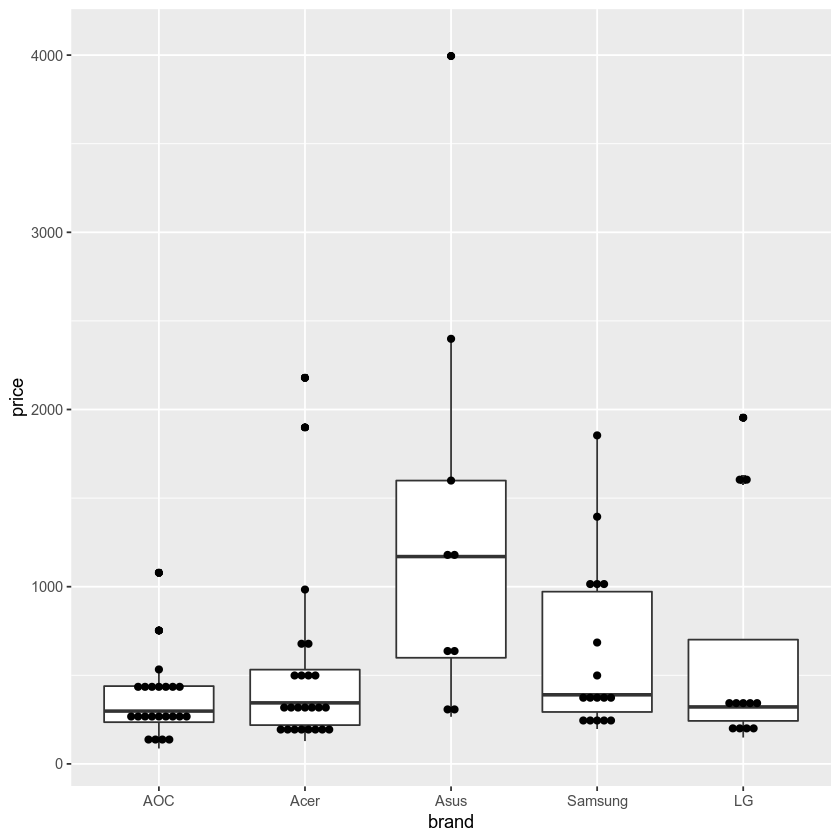

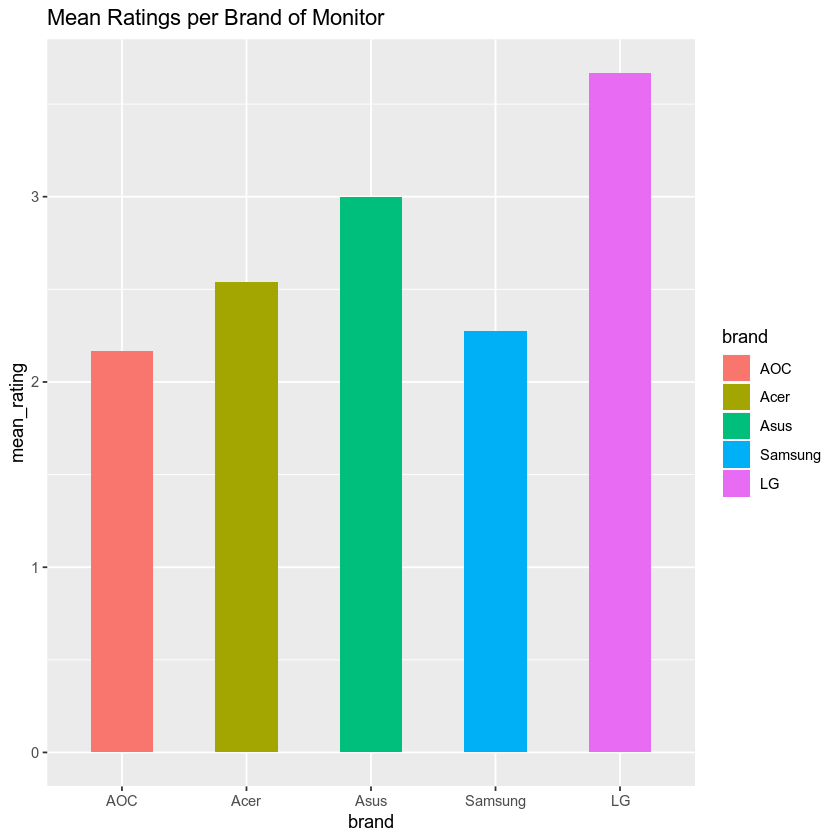

In [9]:
#Merge the dataframes together for use in the graphs
new_df <- merge(brand, makes, by="code") %>%
    merge(monitor, by="id") 
    
#Create a boxplot graph showing the prices of monitors for each brand, with a dotplot overlayed on top of it.
new_df %>%
    filter(price >= 50) %>%
    ggplot(mapping = aes(group = brand, x = brand, y = price)) + 
        geom_boxplot( outlier.shape=16,
             outlier.size=2, notch=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.3)

#Create a bar graph showing the average rating for each company
second_df <- new_df %>%
    group_by(brand) %>%
    summarise(mean_rating = mean(as.numeric(rating)))

ggplot(data=second_df, aes(x=brand, y=mean_rating, fill = brand)) +
  geom_bar(stat="identity", width=0.5) + ggtitle("Mean Ratings per Brand of Monitor")

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.


Attaching package: ‘jsonlite’

The following object is masked from ‘package:purrr’:

    flatten



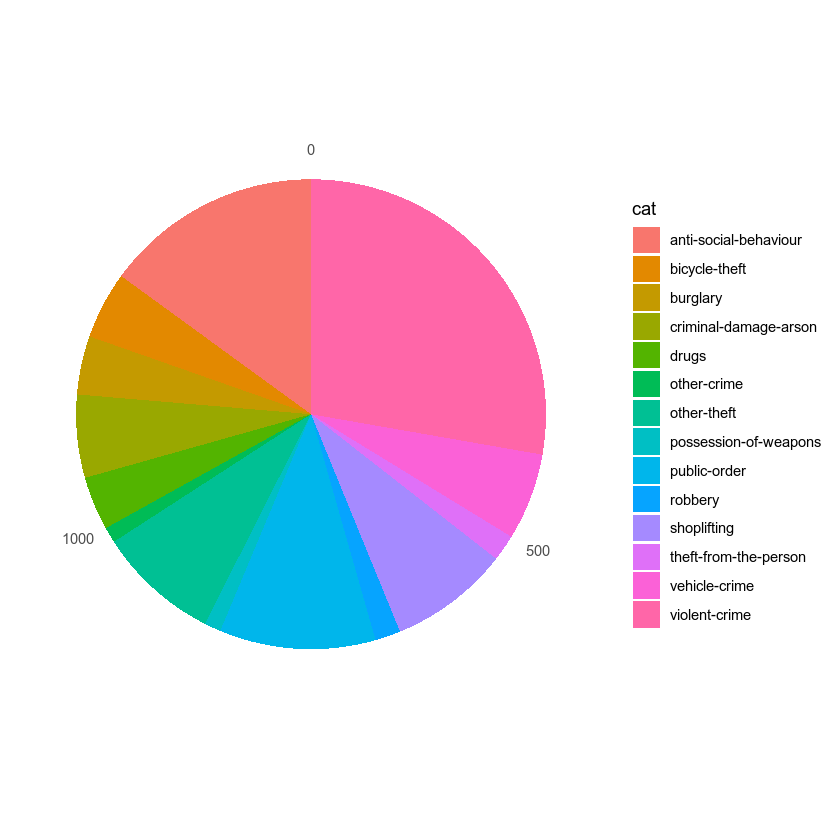

In [10]:
# Bring in librarys needed
library("httr")
library("jsonlite")

# Path to the UK Police website 
path <- "https://data.police.uk/api/crimes-street/all-crime?"

# Give request a latitude and longitude for where we want to see crimes
request <- GET(url = path, query = list(lat="52.629729", lng="-1.131592"))

# Make sure status code is 200 - which means it is a valid request
if (request$status_code == 200) {
    # Get content as text from JSON request
    response <- content(request, as = "text", encoding = "UTF-8")
    df <- fromJSON(response, flatten = TRUE) %>% 
        data.frame()

    # Select just the category, group by them and count the occurances
    df <- select(df, cat=category) %>%
        group_by(cat) %>%
        tally()
    
    #Create a pie graph using the amount of each catagory. 
    df %>%
        ggplot(aes(x="", y=n, fill=cat)) +
        geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) + theme_minimal() +
        theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(),
        panel.grid=element_blank(),
        axis.ticks = element_blank(),
        plot.title=element_text(size=14, face="bold"))
    
} else {
    # Print status code if not 200
    print(request$status_code)
}

### Comment, explain and present the work in a clear way (1 marks)